In [29]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, auc, precision_score, precision_recall_curve,roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Step 01: Fetch data 

In [293]:
dt = pd.read_csv('processed_data.csv')

## Step 02 Gettting ready for Model 

1. select feature set 

In [294]:
dt.columns

Index(['TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'DSL', 'Fiber optic', 'No', 'customerID', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'All services flag'],
      dtype='object')

In [295]:
dt['TotalCharges'] = dt['TotalCharges'].apply(lambda x: np.nan if x==' ' else 0)

In [124]:
dt = dt[dt['TotalCharges'].notnull()]
dt['TotalCharges'] = dt['TotalCharges'].astype(float)

In [296]:
selected_features = ['tenure','Fiber optic','SeniorCitizen','Contract','MonthlyCharges','Partner','TechSupport_No','TechSupport_Yes','All services flag']

2. Encoding 

In [297]:
## Mannual encoding for target variables #
dt['Churn'] = dt['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [298]:
## One hot encoding 
contract_dummies = pd.get_dummies(dt['Contract'])
dt = pd.concat([dt,contract_dummies],axis=1)

In [299]:
## Mannual encoding for features ## 
for i in selected_features:
    if i in ['TechSupport','Partner']:
        dt[i] = dt[i].apply(lambda x: 1 if x=='Yes' else 0)
    elif i in ['InternetService','Contract']:
        dt[i] = dt[i].apply(lambda x: 1 if (x=='DSL') | (x=='Month-to-month')  else (2 if (x=='Fiber optic') | (x=='One year') else 0))
    

3. Splitting 

In [300]:
X = dt[selected_features]
Y = dt['Churn']

In [301]:
X = normalize(X)
X

array([[0.03342589, 0.        , 0.        , ..., 0.03342589, 0.        ,
        0.        ],
       [0.51231886, 0.        , 0.        , ..., 0.0150682 , 0.        ,
        0.        ],
       [0.03710184, 0.        , 0.        , ..., 0.01855092, 0.        ,
        0.        ],
       ...,
       [0.34782272, 0.        , 0.        , ..., 0.03162025, 0.        ,
        0.        ],
       [0.05366175, 0.01341544, 0.01341544, ..., 0.01341544, 0.        ,
        0.        ],
       [0.52978439, 0.00802704, 0.        , ..., 0.        , 0.00802704,
        0.        ]])

In [302]:
train_X,test_X, train_Y, test_Y = train_test_split(X,Y)

In [303]:
train_X[0]

array([0.40752388, 0.0101881 , 0.        , 0.02037619, 0.91285349,
       0.        , 0.        , 0.0101881 , 0.        ])

## Step 03 Machine learning Model 
- First Iteration (logistic Regression)

In [304]:
model = LogisticRegression(n_jobs=6)

In [305]:
model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=6, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [306]:
model.coef_

array([[-4.08963999,  2.21642431,  1.19468878, -3.00998511,  0.95839021,
        -1.09589609,  1.73540561, -1.18445866, -0.11671793]])

## Step 04 Validate Model 

In [307]:
prediction = model.predict(test_X)

1. Accuracy. 

In [308]:
round(accuracy_score(test_Y, prediction)*100,2)

77.91

2. Precision. 

In [309]:
round(precision_score(test_Y, prediction)*100,2)

57.84

3. Recall. 

In [310]:
round(recall_score(test_Y, prediction)*100,2)

47.87

4. Confusion Matrix

In [311]:
confusion_matrix(test_Y,prediction)

array([[1158,  156],
       [ 233,  214]])

In [312]:
print(classification_report(test_Y,prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1314
           1       0.58      0.48      0.52       447

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



## Step 03 Machine learning Model 
- Second Iteration (Decision Tree)

In [239]:
model = DecisionTreeClassifier()

In [240]:
model.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Step 04 Validate Model 

In [241]:
prediction = model.predict(test_X)

1. Accuracy. 

In [242]:
round(accuracy_score(test_Y, prediction)*100,2)

72.91

2. Precision. 

In [243]:
round(precision_score(test_Y, prediction)*100,2)

49.79

3. Recall. 

In [244]:
round(recall_score(test_Y, prediction)*100,2)

50.53

4. Confusion Matrix

In [245]:
confusion_matrix(test_Y,prediction)

array([[1044,  242],
       [ 235,  240]])

Model Analysis:

- How many were actually going to churn and how many our model predicted? 

In [246]:
model_dt = pd.DataFrame({'Actual':test_Y, 'Predicted':prediction})

Text(0.5, 1.0, 'Predicted')

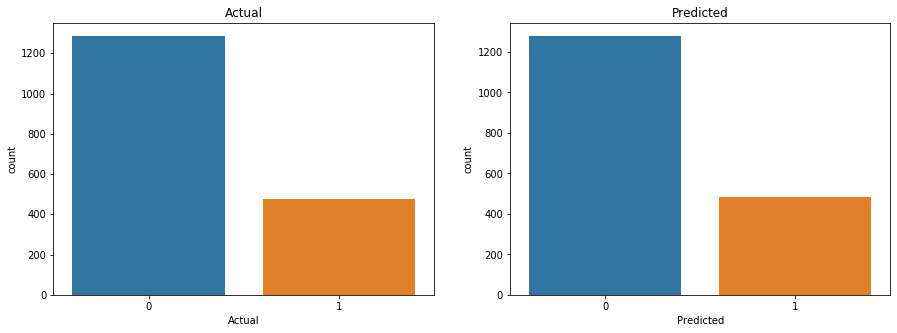

In [247]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
sns.countplot('Actual',data=model_dt, ax=ax[0])
ax[0].set_title('Actual')
sns.countplot('Predicted',data=model_dt, ax=ax[1])
ax[1].set_title('Predicted')

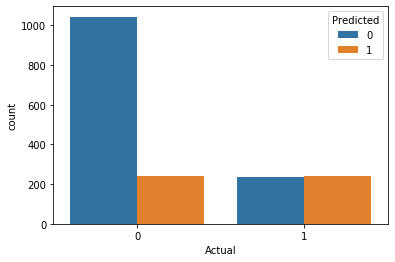

In [248]:
sns.countplot('Actual',hue='Predicted',data=model_dt)

__Observations__:
1. Our model performing well on non-churner although there are false positive but that percentage is low. 
2. Our model is worse on predicting the churner. The percentage of false negative is higher than true negative. 
3. The model is having tough time to define the line to separate the churners that's why the false negative rate is high. i.e  model is predicting non-churners as churner. 

## Baseline Model

In [56]:
prediction = []
for i in range(len(test_Y)):
    prediction.append(0)

In [57]:
accuracy_score(test_Y,prediction)*100

72.7427597955707

In [58]:
precision_score(test_Y,prediction)*100

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [59]:
recall_score(test_Y,prediction)*100

0.0

In [60]:
confusion_matrix(prediction,test_Y)

array([[1281,  480],
       [   0,    0]])

In [226]:
test = pd.DataFrame({'tenure':[1,2,3,4,5,6,7,8,9,10],
                    'Churn':[0,0,0,0,0,1,1,1,1,1]})

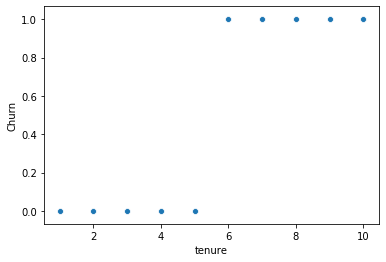

In [227]:
sns.scatterplot(test['tenure'],test['Churn'])

In [228]:
test_model = LogisticRegression()

In [229]:
test_model.fit(test[['tenure']],test['Churn'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
score = test_model.intercept_+test_model.coef_[0][0]*test['tenure']

In [231]:
curve = 1/(1+math.e**-(score))

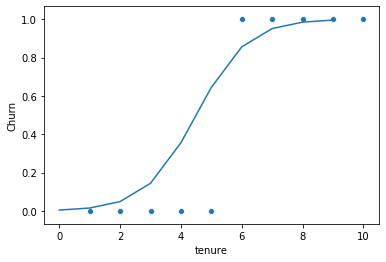

In [232]:
sns.scatterplot(test['tenure'],test['Churn'])
plt.plot(curve)

In [233]:
test_model.predict_proba(test[['tenure']])

array([[0.99521278, 0.00478722],
       [0.98449561, 0.01550439],
       [0.95096786, 0.04903214],
       [0.85557365, 0.14442635],
       [0.64405337, 0.35594663],
       [0.35594659, 0.64405341],
       [0.14442632, 0.85557368],
       [0.04903213, 0.95096787],
       [0.01550439, 0.98449561],
       [0.00478721, 0.99521279]])

In [234]:
test['predicted'] = test_model.predict(test[['tenure']])

In [235]:
test['prob'] = curve

In [236]:
test

,tenure,Churn,predicted,prob
0,1,0,0,0.004787
1,2,0,0,0.015504
2,3,0,0,0.049032
3,4,0,0,0.144426
4,5,0,0,0.355947
5,6,1,1,0.644053
6,7,1,1,0.855574
7,8,1,1,0.950968
8,9,1,1,0.984496
9,10,1,1,0.995213


In [225]:
test

,tenure,Churn,predicted,prob
0,1,1,0,0.5
1,2,1,0,0.5
2,3,1,0,0.5
3,4,1,0,0.5
4,5,1,0,0.5
5,6,1,0,0.5
6,7,1,0,0.5
7,8,1,0,0.5
8,9,1,0,0.5
9,10,1,0,0.5
